# Business Understanding 

Customer Lifetime Value (CLV) adalah salah satu indikator yang digunakan untuk menentukan nilai dari pelanggan sebuah perusahaan. Metrik ini dinilai akurat sehingga banyak digunakan oleh perusahaan dalam menghitung nilai pelanggan mereka.

Ada banyak faktor yang dapat memengaruhi kesuksesan sebuah usaha. Pelanggan atau customer adalah salah satu faktor utama yang menentukan kesuksesaan perusahaan. Maka dari itu, tidak mengherankan jika perusahaan harus menemukan metrik yang digunakan untuk mengukur nilai seorang pelanggan terhadap perusahaan.

Salah satunya adalah Customer Lifetime Value. Perhitungan ini sering digunakan untuk mengukur nilai pelanggan. Jika diterjemahkan secara harfiah, CLV berarti nilai umur pelanggan. Apa yang dimaksud dengan umur pelanggan di sini bukanlah umur pelanggan dilihat dari tahun kelahirannya, melainkan dari rentang waktu ia menggunakan produk atau jasa dari perusahaan.

Lebih jelas lagi, CLV adalah sebuah metrik untuk memperkirakan total nilai pelanggan terhadap sebuah perusahaan dalam jangka waktu tertentu (mengikuti durasi hubungan bisnis keduanya). Secara sederhana, CLV adalah prediksi atas nilai total pendapatan yang bisa didapatkan dari pelanggan tersebut.



**Goal: Predict Nilai Customer Lifetime Value (CLV ) untuk Perusahaan Asuransi Kendaraan.**

Ada banyak keuntungan yang bisa Anda dapat dari CLV. 
- Perusahaan dapat mengetahui mana pelanggan yang nilainya paling tinggi. 
- Mengidentifikasi dan menganalisis perilaku pelanggan selama periode tertentu
- Memprediksi perilaku pelanggan di masa mendatang untuk meningkatkan loyalitas

# Data Understanding

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from datetime import datetime
import json
from wordcloud import WordCloud

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Purwadhika/3. Machine Learning/Capstone Project - Module 3/data_customer_lifetime_value.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


Data terdiri dari 5668 values dengan 11 variabel yang berbeda (categorical and continous DataType).

Dependent variabel adalah Customer Lifetime Value, yang akan dilakukan predict.



In [5]:
df.describe()


,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.00,5669.00,5669.00,5669.00,5669.00
mean,2.98,93.03,431.41,37868.19,8029.87
std,2.39,34.55,287.56,30490.49,6916.71
min,1.00,61.00,0.42,0.00,1898.01
25%,1.00,68.00,266.93,0.00,3954.34
50%,2.00,82.00,379.20,34322.00,5800.19
75%,4.00,109.00,549.99,62464.00,9031.21
max,9.00,297.00,2759.79,99934.00,83325.38


In [6]:
df.isnull().sum()


Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

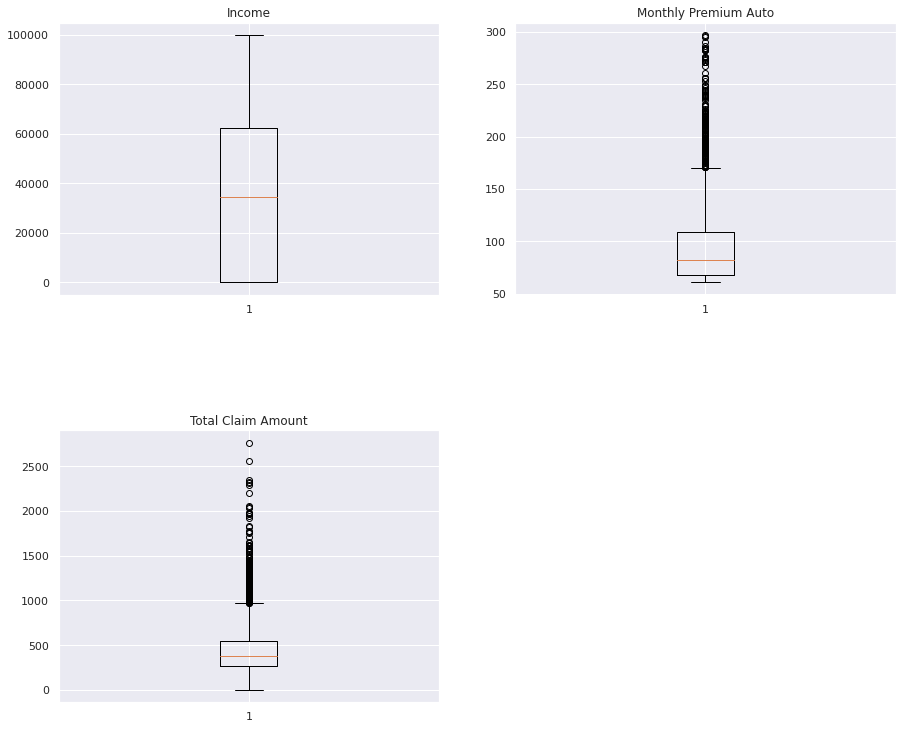

In [8]:
# Looking at outliers of continuos variables

significant_cont = ['Income','Monthly Premium Auto','Total Claim Amount']

sns.set(color_codes=True)
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.5)

for i in range(len(significant_cont)):
    plt.subplot(3,2,i+1)
    plt.boxplot(df[significant_cont[i]])
    plt.title(significant_cont[i])
    
plt.show()


Seperti yang terlihat ada outlier dalam Total Claim Amount dan juga dalam Monthly Premium Auto, biasanya menghilangkan outlier bertujuan untuk model yang lebih baik. Namun dikarenakan dataset yang digunakan adalah dataset industri asuransi, outlier dapat menjadi pelanggan yang potensial. Jadi, model yang akan dibuat aka dibandingkan antara model yang menyertakan outlier dan tidak menyertakan outlier.

Tidak ada outlier dalam Income.




In [9]:
#checking all categorical variables to determine significant ones.

cat = df.select_dtypes(include='object')
col_cat = cat.columns
col_cat

Index(['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus',
       'Marital Status', 'Education'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

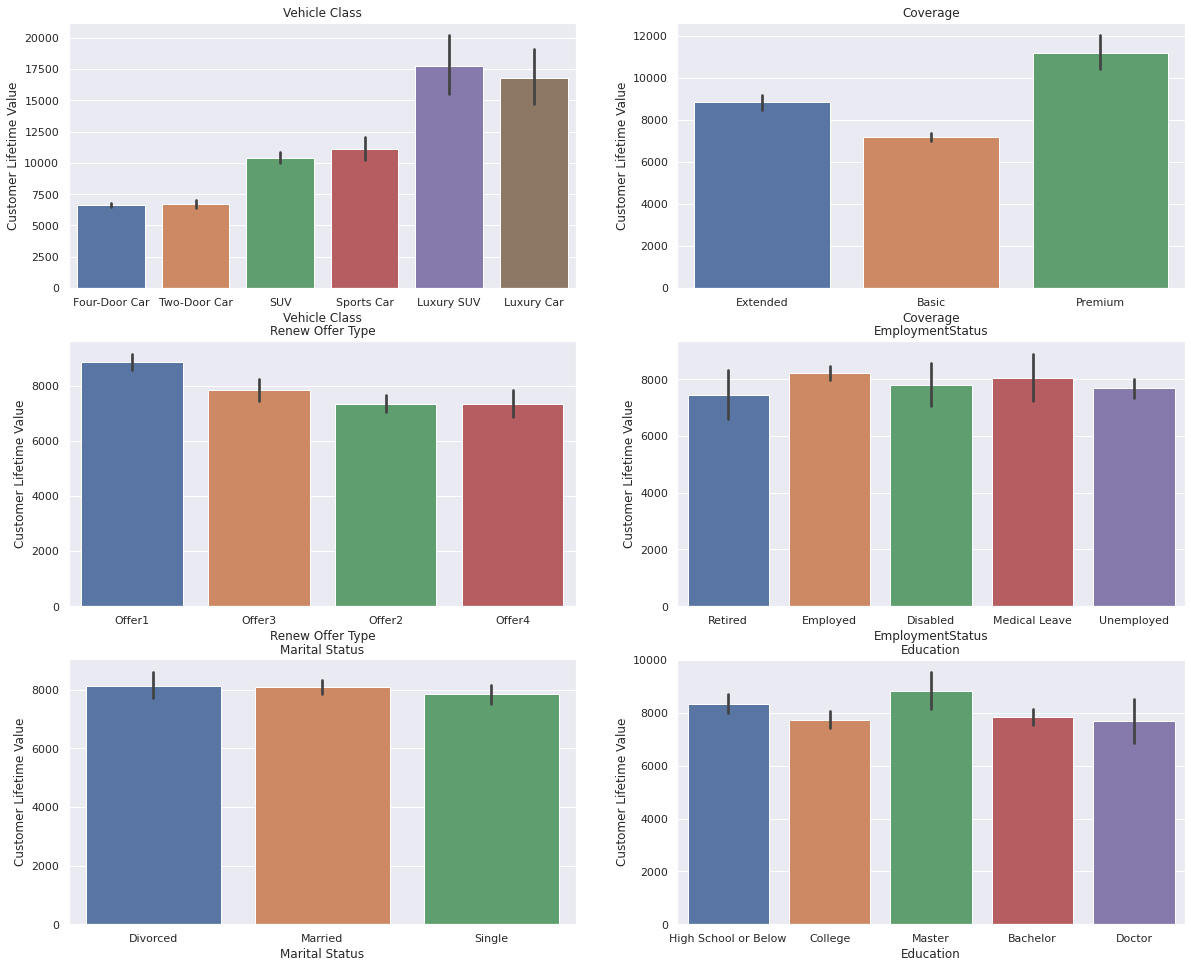

In [10]:
sns.set(color_codes=True)
plt.subplots_adjust(hspace=0.5)
plt.figure(figsize=(20,40))

for i in range(len(col_cat)):
    plt.subplot(7,2,i+1)
    sns.barplot(x = col_cat[i],y='Customer Lifetime Value',data = df)
    plt.title(col_cat[i])
    
plt.show()

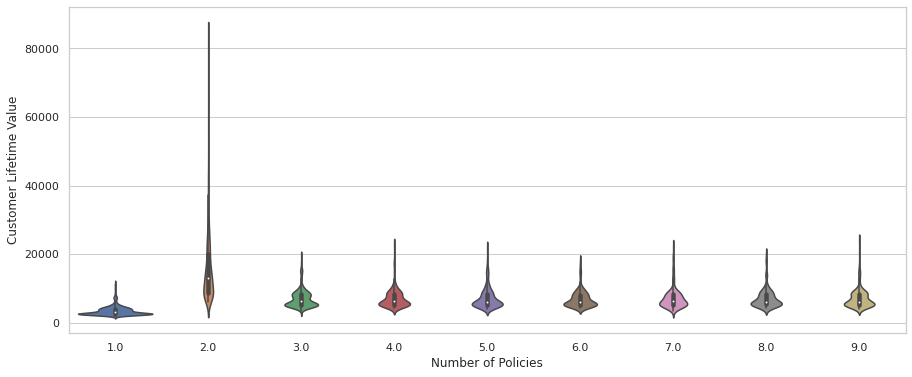

In [11]:

sns.set(style="whitegrid")
plt.figure(figsize=(15,6))
ax = sns.violinplot(x="Number of Policies", y="Customer Lifetime Value", data=df)


Interpretasi dari grafik:

Pelanggan yang hanya mengambil 1 policies memiliki nilai clv yang lebih rendah dan pelanggan yang mengambil 3 policies atau lebih menunjukkan tren yang sama. Jadi, dapat menggabungkan semuanya menjadi satu bin dan juga dapat melihat bahwa pelanggan yang telah mengambil 2 policies memiliki nilai  clv yang sangat tinggi.


# Feature Engineering

## Statistical Analysis


Selain menggunakan interpretasi grafik, perlu dilakukan uji statistik untuk mengetahui independent variabel yang berpengaruh terhadap CLV (dependent variabel).

Uji statistik dilakukan dengan menggunakan F test/ ANOVA.

In [12]:
# Test whether Covarage differences are significant or not.
Coverage = df[['Customer Lifetime Value','Coverage']].groupby('Coverage')
Basic = Coverage['Customer Lifetime Value'].get_group('Basic')
Extended = Coverage['Customer Lifetime Value'].get_group('Extended')
Premium =Coverage['Customer Lifetime Value'].get_group('Premium')

In [13]:
stats.f_oneway(Basic,Extended,Premium)

F_onewayResult(statistic=91.20729557135006, pvalue=1.0314278162635432e-39)

In [14]:
# Test whether Marital Status differences are significant or not.

Marital = df[['Customer Lifetime Value','Marital Status']].groupby('Marital Status')
married = Marital['Customer Lifetime Value'].get_group('Married')
single = Marital['Customer Lifetime Value'].get_group('Single')


In [15]:
stats.ttest_ind(married,single)

Ttest_indResult(statistic=1.1630504201933474, pvalue=0.2448666577802474)

In [16]:
# Test whether Vehicle Class differences are significant or not.

Vehicleclass = df[['Customer Lifetime Value','Vehicle Class']].groupby('Vehicle Class')
fourdoor = Vehicleclass['Customer Lifetime Value'].get_group('Four-Door Car')
twodoor = Vehicleclass['Customer Lifetime Value'].get_group('Two-Door Car')
suv = Vehicleclass['Customer Lifetime Value'].get_group('SUV')
luxurysuv =Vehicleclass['Customer Lifetime Value'].get_group('Luxury SUV')
luxurycar =Vehicleclass['Customer Lifetime Value'].get_group('Luxury Car')
sportscar =Vehicleclass['Customer Lifetime Value'].get_group('Sports Car')



In [17]:
stats.f_oneway(fourdoor,twodoor,suv,luxurysuv,luxurycar,sportscar)

F_onewayResult(statistic=171.19249445898942, pvalue=4.3509258538310365e-170)

In [18]:
# Test whether Renew Offer Type differences are significant or not.

Renewoffer = df[['Customer Lifetime Value','Renew Offer Type']].groupby('Renew Offer Type')
offer1 = Renewoffer['Customer Lifetime Value'].get_group('Offer1')
offer2 = Renewoffer['Customer Lifetime Value'].get_group('Offer2')
offer3 = Renewoffer['Customer Lifetime Value'].get_group('Offer3')
offer4 =Renewoffer['Customer Lifetime Value'].get_group('Offer4')



In [19]:
stats.f_oneway(offer1,offer2,offer3,offer4)

F_onewayResult(statistic=19.576342199647854, pvalue=1.2711637313406483e-12)

In [20]:
# Test whether EmploymentStatus differences are significant or not.


EmploymentStatus = df[['Customer Lifetime Value','EmploymentStatus']].groupby('EmploymentStatus')
employed = EmploymentStatus['Customer Lifetime Value'].get_group('Employed')
unemployed = EmploymentStatus['Customer Lifetime Value'].get_group('Unemployed')
medleave = EmploymentStatus['Customer Lifetime Value'].get_group('Medical Leave')
disabled = EmploymentStatus['Customer Lifetime Value'].get_group('Disabled')
retired = EmploymentStatus['Customer Lifetime Value'].get_group('Retired')

In [21]:
stats.f_oneway(employed,unemployed,medleave,disabled,retired)

F_onewayResult(statistic=1.9697272652056221, pvalue=0.0962726820463628)

In [22]:

# Test whether Education differences are significant or not.

Education = df[['Customer Lifetime Value','Education']].groupby('Education')
bachelor = Education['Customer Lifetime Value'].get_group('Bachelor')
college = Education['Customer Lifetime Value'].get_group('College')
highschool = Education['Customer Lifetime Value'].get_group('High School or Below')
master = Education['Customer Lifetime Value'].get_group('Master')
doctor = Education['Customer Lifetime Value'].get_group('Doctor')

In [23]:
stats.f_oneway(bachelor,college,highschool,master,doctor)

F_onewayResult(statistic=3.4913206729535835, pvalue=0.007454543234145381)

Drop variabel yang berdasarkan uji statistik tidak significant terhadap variabel target.

In [24]:
df2 =df.copy()

In [25]:
df2.drop(['Coverage','Renew Offer Type','Vehicle Class'],axis=1,inplace = True)

Berdasarkan grafik sebelumnya, dapat dilihat bahwa data dengan number policies >= 3 memilki CLV yang sama, sehingga akan dikelompokkan menjadi satu kategori.

In [26]:
df2['Number of Policies'] = np.where(df2['Number of Policies']>2,3,df2['Number of Policies'])

In [27]:
dummies = pd.get_dummies(df2,columns=['Marital Status','Number of Policies','Education','EmploymentStatus'],drop_first=True)

In [28]:
dummies

,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value,Marital Status_Married,Marital Status_Single,Number of Policies_2.0,Number of Policies_3.0,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed
0,90.00,571.48,11828.00,10083.49,0,0,1,0,0,0,1,0,0,0,1,0
1,62.00,114.51,44762.00,4943.39,1,0,0,1,1,0,0,0,1,0,0,0
2,62.00,257.25,21514.00,11981.98,1,0,1,0,0,0,0,1,0,0,1,0
3,116.00,556.80,17913.00,4550.86,1,0,0,0,0,0,1,0,0,0,0,0
4,62.00,355.82,19030.00,2372.16,1,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5664,74.00,532.80,0.00,2442.22,0,1,0,0,0,0,1,0,0,0,0,1
5665,109.00,523.20,27778.00,12904.94,0,0,1,0,0,0,0,0,1,0,0,0
5666,62.00,44.78,84658.00,2447.05,0,1,0,0,0,0,0,0,1,0,0,0
5667,239.00,1294.70,22705.00,19160.99,0,0,0,1,0,0,0,1,1,0,0,0


# Modelling:

EVALUATION MATRIKS: 

Skor R2 terletak diantara 0 dan 1. Jika skor R2 mendekati nilai 1, maka nilai prediksi mendekati nilai sebenarnya. Atau bisa disimpulkan bahwa model prediksi yang dibuat baik. Sebaliknya jika skor R2 mendekati 0, maka model prediksi memiliki kualitas yang buruk. 


Selain skor R2, ada beberapa metriks lainnya yang bisa digunakan untuk mengevaluasi performa model.

MSE (Mean Square Error): mengevaluasi model dengan melihat nilai error suatu prediksi berdasarkan konsep jarak Euclidean.

MAE (Mean Absolute Error): mengevaluasi model dengan melihat nilai error suatu prediksi berdasarkan konsep Manhattan.

MAPE adalah rataan persentase error yang dihasilkan oleh model regresi.

RMSE adalah nilai rataan akar kuadrat dari error\.

## Model 1

### Model dengan data asli

In [29]:
import statsmodels.api as sm

y = dummies['Customer Lifetime Value']
x = dummies.drop('Customer Lifetime Value',axis=1)


x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.639
Model:                                 OLS   Adj. R-squared:                  0.638
Method:                      Least Squares   F-statistic:                     667.7
Date:                     Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                             04:08:00   Log-Likelihood:                -55277.
No. Observations:                     5669   AIC:                         1.106e+05
Df Residuals:                         5653   BIC:                         1.107e+05
Df Model:                               15                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -4651.8358    347.577    -13.384      0.000   -5333.220   -3970.451
Monthly Premium Auto              85.3039      2.215     38.507      0.000      80.961      89.647
Total Claim Amount                -0.7254      0.292     -2.484      0.013      -1.298      -0.153
Income                          9.499e-05      0.003      0.030      0.976      -0.006       0.006
Marital Status_Married            77.4012    161.955      0.478      0.633    -240.092     394.894
Marital Status_Single           -113.1653    188.528     -0.600      0.548    -482.752     256.421
Number of Policies_2.0          1.229e+04    144.649     84.939      0.000     1.2e+04    1.26e+04
Number of Policies_3.0          3546.9761    127.995     27.712      0.000    3296.057    3797.895
Education_College               -167.9851    143.603     -1.170      0.242    -449.502     113.532
Education_Doctor                 285.5061    295.812      0.965      0.335    -294.399     865.412
Education_High School or Below   260.5958    145.237      1.794      0.073     -24.124     545.316
Education_Master                 496.5702    220.015      2.257      0.024      65.257     927.883
EmploymentStatus_Employed        664.9798    295.978      2.247      0.025      84.749    1245.211
EmploymentStatus_Medical Leave   823.4174    365.952      2.250      0.024     106.011    1540.824
EmploymentStatus_Retired         101.6318    407.764      0.249      0.803    -697.742     901.006
EmploymentStatus_Unemployed      148.1734    298.003      0.497      0.619    -436.026     732.373
==============================================================================
Omnibus:                     4460.619   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           160492.161
Skew:                           3.473   Prob(JB):                         0.00
Kurtosis:                      28.124   Cond. No.                     5.53e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Split Dataset

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 450)

print('Train Data Count: {}'.format(x_train.shape[0]))
print('Test Data Count: {}'.format(x_test.shape[0]))

x_train = sm.add_constant(x_train)
results = sm.OLS(y_train, x_train).fit()
results.summary()

Train Data Count: 4251
Test Data Count: 1418


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.652
Model:                                 OLS   Adj. R-squared:                  0.651
Method:                      Least Squares   F-statistic:                     528.9
Date:                     Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                             04:08:00   Log-Likelihood:                -41259.
No. Observations:                     4251   AIC:                         8.255e+04
Df Residuals:                         4235   BIC:                         8.265e+04
Df Model:                               15                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -4549.6405    381.263    -11.933      0.000   -5297.116   -3802.165
Monthly Premium Auto              82.9791      2.471     33.576      0.000      78.134      87.824
Total Claim Amount                -0.4845      0.326     -1.487      0.137      -1.123       0.154
Income                             0.0006      0.004      0.172      0.864      -0.006       0.008
Marital Status_Married            80.3307    178.418      0.450      0.653    -269.463     430.124
Marital Status_Single           -140.5879    207.698     -0.677      0.499    -547.784     266.608
Number of Policies_2.0          1.208e+04    159.300     75.826      0.000    1.18e+04    1.24e+04
Number of Policies_3.0          3504.7879    141.650     24.743      0.000    3227.081    3782.495
Education_College               -204.3485    158.954     -1.286      0.199    -515.982     107.285
Education_Doctor                 191.6461    323.353      0.593      0.553    -442.296     825.588
Education_High School or Below   174.3880    161.383      1.081      0.280    -142.008     490.783
Education_Master                 635.3794    240.700      2.640      0.008     163.482    1107.277
EmploymentStatus_Employed        730.9276    327.754      2.230      0.026      88.358    1373.498
EmploymentStatus_Medical Leave   707.3227    406.627      1.739      0.082     -89.878    1504.524
EmploymentStatus_Retired         373.1775    445.264      0.838      0.402    -499.774    1246.129
EmploymentStatus_Unemployed      214.1737    329.937      0.649      0.516    -432.676     861.023
==============================================================================
Omnibus:                     3064.469   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76982.446
Skew:                           3.153   Prob(JB):                         0.00
Kurtosis:                      22.871   Cond. No.                     5.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 **Rsq = 0.65**

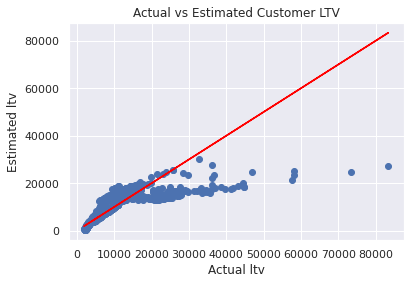

In [31]:
# Model graph to see predictions


x_test = sm.add_constant(x_test)

y_preds = results.predict(x_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV")
plt.show()

In [32]:
#lets see their errors

print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)        : 2174.4799321179503
Mean Sq. Error (MSE)          : 21793094.107778084
Root Mean Sq. Error (RMSE)     : 4668.307413589864
Mean Abs. Perc. Error (MAPE) : 23.67839677748293


## Model 2

### Data log with outliers

In [33]:
#duplicate the original data and get the log version of it to be able to reach higher R2(with outliers)
df3 = dummies.copy()

df3['Monthly Premium Auto'] = np.log(df2['Monthly Premium Auto'])
df3['Total Claim Amount'] = np.log(df2['Total Claim Amount'])
y = np.log(df3['Customer Lifetime Value'])

import statsmodels.api as sm


x1 =  df3.drop('Customer Lifetime Value',axis=1)

In [34]:
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size = 0.25, random_state = 450)

print('Train Data Count: {}'.format(x1_train.shape[0]))
print('Test Data Count: {}'.format(x1_test.shape[0]))

x1_train = sm.add_constant(x1_train)
results_log = sm.OLS(y_train, x1_train).fit()
results_log.summary()

Train Data Count: 4251
Test Data Count: 1418


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.903
Model:                                 OLS   Adj. R-squared:                  0.903
Method:                      Least Squares   F-statistic:                     2626.
Date:                     Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                             04:08:00   Log-Likelihood:                 722.35
No. Observations:                     4251   AIC:                            -1413.
Df Residuals:                         4235   BIC:                            -1311.
Df Model:                               15                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.6582      0.049     74.119      0.000       3.561       3.755
Monthly Premium Auto               0.9866      0.011     87.348      0.000       0.964       1.009
Total Claim Amount                -0.0023      0.004     -0.551      0.582      -0.011       0.006
Income                           3.27e-07   1.81e-07      1.807      0.071   -2.78e-08    6.82e-07
Marital Status_Married             0.0154      0.009      1.674      0.094      -0.003       0.033
Marital Status_Single             -0.0193      0.011     -1.814      0.070      -0.040       0.002
Number of Policies_2.0             1.4082      0.008    171.964      0.000       1.392       1.424
Number of Policies_3.0             0.6911      0.007     94.893      0.000       0.677       0.705
Education_College                 -0.0103      0.008     -1.255      0.210      -0.026       0.006
Education_Doctor                   0.0234      0.017      1.405      0.160      -0.009       0.056
Education_High School or Below     0.0154      0.008      1.855      0.064      -0.001       0.032
Education_Master                   0.0446      0.012      3.602      0.000       0.020       0.069
EmploymentStatus_Employed          0.0592      0.017      3.512      0.000       0.026       0.092
EmploymentStatus_Medical Leave     0.0368      0.021      1.759      0.079      -0.004       0.078
EmploymentStatus_Retired           0.0209      0.023      0.912      0.362      -0.024       0.066
EmploymentStatus_Unemployed       -0.0096      0.017     -0.569      0.569      -0.043       0.024
==============================================================================
Omnibus:                     1350.257   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5562.804
Skew:                           1.512   Prob(JB):                         0.00
Kurtosis:                       7.719   Cond. No.                     7.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Rsq = 0.903**

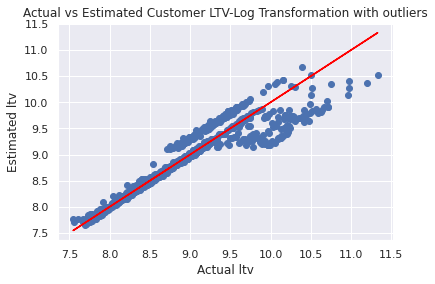

In [35]:
# Model graph to see predictions


x1_test = sm.add_constant(x1_test)

y_preds = results_log.predict(x1_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV-Log Transformation with outliers")
plt.show()

In [36]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)        : 0.10626499431730584
Mean Sq. Error (MSE)          : 0.043576473109968414
Root Mean Sq. Error (RMSE)     : 0.2087497858920301
Mean Abs. Perc. Error (MAPE) : 1.122472395230531


## Model 3

### Data without outliers

In [37]:
#duplicate the original data and winsorize the data at %5
df4 = dummies.copy()

df4['Monthly Premium Auto'] = winsorize(df4['Monthly Premium Auto'],(0, 0.05))
df4['Total Claim Amount'] = winsorize(df4['Total Claim Amount'],(0, 0.05))


y = df4['Customer Lifetime Value']
x3 =  df4.drop('Customer Lifetime Value',axis=1)


In [38]:
x3_train, x3_test, y_train, y_test = train_test_split(x3, y, test_size = 0.25, random_state = 450)

print('Train Data Count: {}'.format(x3_train.shape[0]))
print('Test Data Count: {}'.format(x3_test.shape[0]))


x3_train = sm.add_constant(x3_train)
results_wins = sm.OLS(y_train, x3_train).fit()
results_wins.summary()

Train Data Count: 4251
Test Data Count: 1418


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.642
Model:                                 OLS   Adj. R-squared:                  0.641
Method:                      Least Squares   F-statistic:                     507.0
Date:                     Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                             04:08:01   Log-Likelihood:                -41317.
No. Observations:                     4251   AIC:                         8.267e+04
Df Residuals:                         4235   BIC:                         8.277e+04
Df Model:                               15                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -5842.2270    403.026    -14.496      0.000   -6632.369   -5052.085
Monthly Premium Auto              95.0841      2.887     32.939      0.000      89.425     100.743
Total Claim Amount                 0.2131      0.374      0.570      0.569      -0.520       0.946
Income                             0.0012      0.004      0.338      0.735      -0.006       0.008
Marital Status_Married            60.3454    180.880      0.334      0.739    -294.274     414.964
Marital Status_Single           -204.4771    210.262     -0.972      0.331    -616.701     207.747
Number of Policies_2.0          1.206e+04    161.511     74.672      0.000    1.17e+04    1.24e+04
Number of Policies_3.0          3495.1438    143.616     24.337      0.000    3213.581    3776.706
Education_College               -224.5356    161.191     -1.393      0.164    -540.555      91.484
Education_Doctor                 282.0011    327.830      0.860      0.390    -360.717     924.719
Education_High School or Below   168.0426    163.487      1.028      0.304    -152.477     488.562
Education_Master                 706.4617    244.117      2.894      0.004     227.864    1185.060
EmploymentStatus_Employed        850.7032    332.228      2.561      0.010     199.361    1502.045
EmploymentStatus_Medical Leave   683.7261    412.233      1.659      0.097    -124.466    1491.919
EmploymentStatus_Retired         409.1148    451.541      0.906      0.365    -476.142    1294.371
EmploymentStatus_Unemployed      164.7558    334.418      0.493      0.622    -490.878     820.390
==============================================================================
Omnibus:                     3116.617   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82926.261
Skew:                           3.211   Prob(JB):                         0.00
Kurtosis:                      23.662   Cond. No.                     5.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Rsq = 0.64**

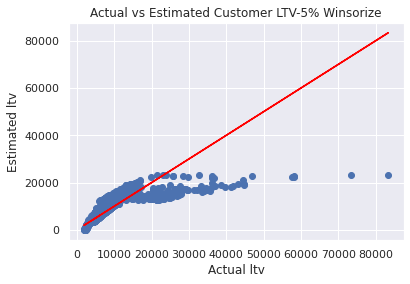

In [39]:
# Model graph to see predictions


x3_test = sm.add_constant(x3_test)

y_preds = results_wins.predict(x3_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV-5% Winsorize")
plt.show()

In [40]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)        : 2323.2743334443708
Mean Sq. Error (MSE)          : 22253073.883624654
Root Mean Sq. Error (RMSE)     : 4717.316385788074
Mean Abs. Perc. Error (MAPE) : 26.951951924907707


## Model 4

### Data  log without outlier

In [41]:
#duplicate the original data and take log of the data without outlier

df5 = df4.copy()


df5['Monthly Premium Auto'] = np.log(df5['Monthly Premium Auto'])
df5['Total Claim Amount'] = np.log(df5['Total Claim Amount'])


y = np.log(df5['Customer Lifetime Value'])
x7 =df5.drop('Customer Lifetime Value',axis=1)


In [42]:
x7_train, x7_test, y_train, y_test = train_test_split(x7, y, test_size = 0.25, random_state = 450)

print('Train Data Count: {}'.format(x7_train.shape[0]))
print('Test Data Count: {}'.format(x7_test.shape[0]))


x7_train = sm.add_constant(x7_train)
results_logwins = sm.OLS(y_train, x7_train).fit()
results_logwins.summary()

Train Data Count: 4251
Test Data Count: 1418


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.898
Model:                                 OLS   Adj. R-squared:                  0.897
Method:                      Least Squares   F-statistic:                     2477.
Date:                     Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                             04:08:02   Log-Likelihood:                 610.77
No. Observations:                     4251   AIC:                            -1190.
Df Residuals:                         4235   BIC:                            -1088.
Df Model:                               15                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.3154      0.055     60.649      0.000       3.208       3.423
Monthly Premium Auto               1.0598      0.012     84.912      0.000       1.035       1.084
Total Claim Amount                 0.0017      0.004      0.397      0.692      -0.007       0.010
Income                          3.122e-07   1.86e-07      1.681      0.093    -5.2e-08    6.76e-07
Marital Status_Married             0.0141      0.009      1.496      0.135      -0.004       0.033
Marital Status_Single             -0.0199      0.011     -1.829      0.067      -0.041       0.001
Number of Policies_2.0             1.4068      0.008    167.345      0.000       1.390       1.423
Number of Policies_3.0             0.6908      0.007     92.382      0.000       0.676       0.705
Education_College                 -0.0113      0.008     -1.344      0.179      -0.028       0.005
Education_Doctor                   0.0267      0.017      1.565      0.118      -0.007       0.060
Education_High School or Below     0.0167      0.008      1.966      0.049    4.32e-05       0.033
Education_Master                   0.0479      0.013      3.774      0.000       0.023       0.073
EmploymentStatus_Employed          0.0651      0.017      3.765      0.000       0.031       0.099
EmploymentStatus_Medical Leave     0.0349      0.021      1.625      0.104      -0.007       0.077
EmploymentStatus_Retired           0.0219      0.024      0.930      0.352      -0.024       0.068
EmploymentStatus_Unemployed       -0.0111      0.017     -0.639      0.523      -0.045       0.023
==============================================================================
Omnibus:                     1272.754   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4689.833
Skew:                           1.460   Prob(JB):                         0.00
Kurtosis:                       7.237   Cond. No.                     8.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Rsq = 0.89**

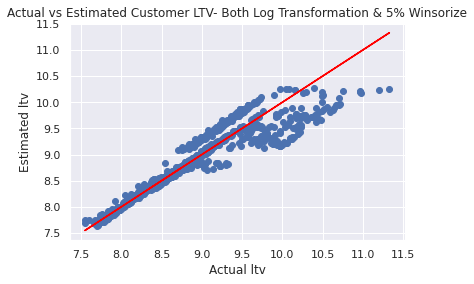

In [43]:
# Model graph to see predictions


x7_test = sm.add_constant(x7_test)

y_preds = results_logwins.predict(x7_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV- Both Log Transformation & 5% Winsorize")
plt.show()

In [44]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)        : 0.11669527499239643
Mean Sq. Error (MSE)          : 0.04665214314105823
Root Mean Sq. Error (RMSE)     : 0.21599107190126685
Mean Abs. Perc. Error (MAPE) : 1.2366926288238373


## Model 5

### Data log with outlier dengan Polynomial Features

In [45]:
#the best model is the one with log transformation and outliers included

#Let's use polynomial features to see if we can do better


from sklearn.preprocessing import PolynomialFeatures


y = np.log(df3['Customer Lifetime Value'])
x5 =df3.drop('Customer Lifetime Value',axis=1)


pol = PolynomialFeatures()


array = pol.fit_transform(x5)

df_pol = pd.DataFrame(array)
df_pol.columns = pol.get_feature_names(x5.columns)


In [46]:
df_pol_train, df_pol_test, y_train, y_test = train_test_split(df_pol, y, test_size = 0.25, random_state = 450)

print('Train Data Count: {}'.format(df_pol_train.shape[0]))
print('Test Data Count: {}'.format(df_pol_test.shape[0]))

df_pol_train = sm.add_constant(df_pol_train)
results_pol = sm.OLS(y_train, df_pol_train).fit()
results_pol.summary()

Train Data Count: 4251
Test Data Count: 1418


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.907
Model:                                 OLS   Adj. R-squared:                  0.905
Method:                      Least Squares   F-statistic:                     378.1
Date:                     Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                             04:08:02   Log-Likelihood:                 816.47
No. Observations:                     4251   AIC:                            -1417.
Df Residuals:                         4143   BIC:                            -730.6
Df Model:                              107                                         
Covariance Type:                 nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
1                                                                 3.0279      0.612      4.951      0.000       1.829       4.227
Monthly Premium Auto                                              1.2162      0.252      4.826      0.000       0.722       1.710
Total Claim Amount                                               -0.0322      0.072     -0.444      0.657      -0.174       0.110
Income                                                         5.759e-06   4.14e-06      1.391      0.164   -2.36e-06    1.39e-05
Marital Status_Married                                            0.0698      0.072      0.974      0.330      -0.071       0.210
Marital Status_Single                                             0.1182      0.086      1.367      0.172      -0.051       0.288
Number of Policies_2.0                                            0.8158      0.065     12.577      0.000       0.689       0.943
Number of Policies_3.0                                            0.3382      0.058      5.876      0.000       0.225       0.451
Education_College                                                -0.0613      0.066     -0.927      0.354      -0.191       0.068
Education_Doctor                                                  0.0711      0.127      0.558      0.577      -0.179       0.321
Education_High School or Below                                   -0.0336      0.066     -0.506      0.613      -0.164       0.096
Education_Master                                                  0.0231      0.095      0.244      0.808      -0.163       0.209
EmploymentStatus_Employed                                        -0.0083      0.137     -0.061      0.951      -0.277       0.260
EmploymentStatus_Medical Leave                                    0.4569      0.175      2.618      0.009       0.115       0.799
EmploymentStatus_Retired                                          0.3049      0.222      1.371      0.170      -0.131       0.741
EmploymentStatus_Unemployed                                       0.1345      0.139      0.970      0.332      -0.137       0.406
Monthly Premium Auto^2                                           -0.0210      0.031     -0.673      0.501      -0.082       0.040
Monthly Premium Auto Total Claim Amount                           0.0082      0.016      0.508      0.612      -0.024       0.040
Monthly Premium Auto Income                                   -1.151e-06   6.73e-07     -1.711      0.087   -2.47e-06    1.68e-07
Monthly Premium Auto Marital Status_Married                       0.0280      0.034      0.835      0.404      -0.038       0.094
Monthly Premium Auto Marital Status_Si

 **Rsq = 0.907**

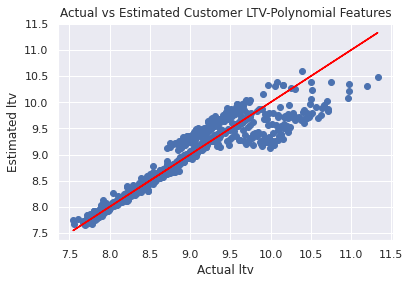

In [47]:
# Model graph to see predictions


df_pol_test = sm.add_constant(df_pol_test)

y_preds = results_pol.predict(df_pol_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV-Polynomial Features")
plt.show()

In [48]:
print("Mean Absolute Error (MAE)     : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)    : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE)  : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)     : 0.11051161909746059
Mean Sq. Error (MSE)          : 0.043523386951936575
Root Mean Sq. Error (RMSE)    : 0.20862259453840704
Mean Abs. Perc. Error (MAPE)  : 1.1750108312590208


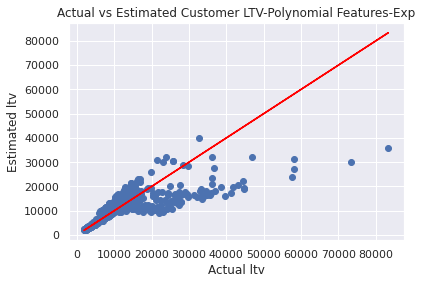

In [50]:
# Model graph to see exponential version of predictions


df_pol_test = sm.add_constant(df_pol_test)

y_preds = np.exp(results_pol.predict(df_pol_test))
sns.set(color_codes=True)
plt.scatter(exp_ytest, y_preds)
plt.plot(exp_ytest, exp_ytest, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV-Polynomial Features-Exp")
plt.show()


Skor aktual dan skor prediksi memiliki linearitas yang baik tetapi setelah beberapa titik terlihat bahwa linearitas tersebut tidak cukup baik. Pada grafik, terlihat bahwa prediksi nilai clv pelanggan lebih baik dengan nilai lebih rendah dari 10.000. 

In [51]:
mse( y_test[y_test<10],y_preds[y_test<10])

67993966.32574446

Terlihat bahwa Mean Sq. Error menurun dari 0,04 menjadi 0,02 yang hampir setengah dari error awal.

## Model Linear Regression

Algoritma Linear Regression menggunakan prinsip regresi. Regresi membuat model prediksi untuk target variabel berdasarkan dari variabel bebasnya. Jenis algoritma ini sering digunakan untuk mencari hubungan antara variabel-variabel yang ada dan prediksinya. Sehingga pada linear regression, ditujukan untuk melakukan prediksi pada variabel terikat (y) berdasarkan variabel bebas yang diberikan (x). Hasil akhirnya berupa hubungan linear antara variabel input (x) dengan variabel output(y). 

Linear regression memiliki beberapa kelebihan jika digunakan untuk memprediksi suatu model. Berikut beberapa kelebihan dari linear regression:

1. Mudah diimplementasikan dan diinterpretasikan. Hal ini karena linear regression hanya melihat keterhubungan dari variabel input (x) dan variabel output (y) saja.

2. Menghasilkan model prediksi yang paling akurat untuk data yang bersifat linear.

3. Mudah untuk dilakukan evaluasi dan memiliki beragam metode atau metriks yang mudah diterapkan

Let's check the test /train data prediction if there is underfitting/overfitting problem

In [52]:
lrm = LinearRegression()
lrm.fit(df_pol_train, y_train)

y_train_predict = lrm.predict(df_pol_train)
y_test_predict = lrm.predict(df_pol_test)

print("Train observation number  : {}".format(df_pol_train.shape[0]))
print("Test observation number   : {}".format(df_pol_test.shape[0]), "\n")

print("Train R-Square  : {}".format(lrm.score(df_pol_train, y_train)))
print("-----Test Scores---")
print("Test R-Square   : {}".format(lrm.score(df_pol_test, y_test)))
print("Mean_absolute_error (MAE)             : {}".format(mean_absolute_error(y_test, y_test_predict)))
print("Mean squared error (MSE)              : {}".format(mse(y_test, y_test_predict)))
print("Root mean squared error(RMSE)         : {}".format(rmse(y_test, y_test_predict)))
print("Mean absolute percentage error (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_predict) / y_test)) * 100))

Train observation number  : 4251
Test observation number   : 1418 

Train R-Square  : 0.907115762303218
-----Test Scores---
Test R-Square   : 0.9011479854827954
Mean_absolute_error (MAE)             : 0.11051159739729226
Mean squared error (MSE)              : 0.043523496092175935
Root mean squared error(RMSE)         : 0.20862285611163495
Mean absolute percentage error (MAPE) : 1.1750104671269639


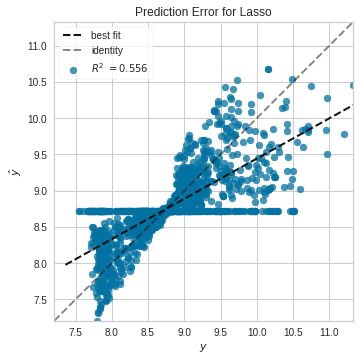

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError


# Create the train and test data
df_pol_train, df_pol_test, y_train, y_test = train_test_split(df_pol, y, test_size = 0.25, random_state = 450)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(df_pol_train, y_train)  # Fit the training data to the visualizer
visualizer.score(df_pol_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

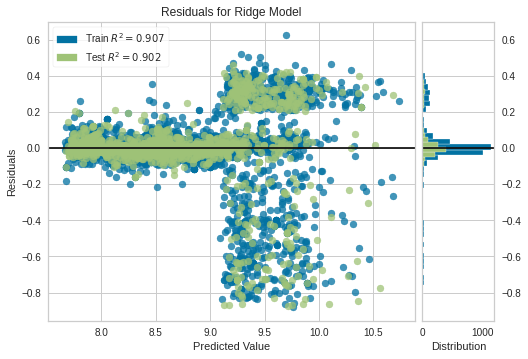

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot


# Instantiate the linear model and visualizer
Model = Ridge()
visualizer_residual = ResidualsPlot(Model)

visualizer_residual.fit(df_pol_train, y_train)  # Fit the training data to the visualizer
visualizer_residual.score(df_pol_test, y_test)  # Evaluate the model on the test data
visualizer_residual.show()                 # Finaliz

# Conclusion

Setelah membuat enam model berbeda untuk mencapai model terbaik dengan R-square tertinggi dan error lebih rendah.

Berdasarkan tabel perbandingan, kita dapat memilih menggunakan model ke-5 yang memiliki transformasi log, wih outlier dan fitur polinomial. Kemudian dari data model ke-5 diaplikasikan algoritma Linear Regression. Dimana memiliki hasil R square adalah 0,91 berarti 91% varian dapat dijelaskan, yang sangat tinggi. Dan nilai error yang rendah.

Skor aktual dan skor prediksi memiliki linearitas yang baik tetapi setelah beberapa titik terlihat bahwa linearitas tersebut tidak cukup baik. Pada grafik terlihat bahwa prediksi nilai CLV pelanggan lebih baik dengan nilai lebih rendah dari 10.000. 

Tidak terdapat masalah overfitting dan underfitting pada model, tetapi tetap memeriksa model Lasso dan Ridge untuk melihat apakah ada perubahan pada modelnya. Dan model dibangun dengan sangat baik.

# Rocemmendation

- Model dapat mengcapture dengan sangat baik untuk predict CLV, tetapi untuk permodelan dapat menggunakan algoritma yang lainnya untuk mengetahui perbandingannya.

- Dengan predict CLV dari permodelan ini, dapat mengetahui CLV dari pelanggan. Informasi terssebut dapat digunakan sebagai strategi pemasaran perusahaan yang lebih optimal. Dengan CLV juga dapat dijadikan sebagai pertimbangan perusahaan dalam melakukan segmentasi pelanggan dan memberikan pelayanan yang sesuai.

# Save Model

In [55]:
import pickle

In [56]:
filename = 'finalized_modellrm.sav'
pickle.dump(lrm, open(filename, 'wb'))

In [58]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(df_pol_test, y_test)
print(result)

0.9011479854827954
